# Import Libraries

In [1]:
import numpy as np
import sklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import FastICA
from sklearn.externals.six import StringIO  
from sklearn.svm import SVC
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from pydotplus import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

# Data Reading and Cleaning

In [2]:
df=pd.read_csv("phl_hec_all_confirmed.csv", error_bad_lines=False)
df=df[["P. Name","P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Ts Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)","P. Habitable Class"]]
df=df.dropna()
df.head()

b'Skipping line 3742: expected 68 fields, saw 69\nSkipping line 3743: expected 68 fields, saw 69\n'


,P. Name,P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Mean (EU),P. Teq Mean (K),P. Ts Mean (K),P. Surf Press (EU),...,P. Mean Distance (AU),P. Eccentricity,S. Mass (SU),S. Radius (SU),S. Teff (K),S. Luminosity (SU),S. [Fe/H],S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. Habitable Class
42,55 Cnc e,8.10,1.99,1.03,2.05,2.02,2440.741,1790.4,1833.5,8.3,...,0.02,0.03,0.91,0.94,5196.0,0.581554,0.31,0.591,1.419,non-habitable
44,61 Vir b,5.09,1.66,1.10,1.84,1.75,296.5414,1054.4,1095.7,5.6,...,0.05,0.12,0.95,0.94,5531.0,0.741925,-0.01,0.656,1.556,non-habitable
61,BD+20 594 b,16.31,2.23,1.47,3.28,2.71,14.70450,498.9,546.5,24.0,...,0.24,0.00,0.96,0.93,5766.0,0.854052,-0.15,0.694,1.636,non-habitable
69,BD-06 1339 b,8.58,1.91,1.23,2.35,2.12,456.2180,1177.4,1221.5,10.6,...,0.04,0.00,0.70,1.64,4324.0,0.835718,-0.14,0.735,1.832,non-habitable
92,CoRoT-7 b,4.74,1.52,1.34,2.04,1.76,1842.386,1664.6,1706.5,6.4,...,0.02,0.12,0.93,0.87,5313.0,0.541113,0.03,0.567,1.355,non-habitable


In [3]:
df.columns

Index(['P. Name', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)',
       'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Mean (EU)',
       'P. Teq Mean (K)', 'P. Ts Mean (K)', 'P. Surf Press (EU)',
       'P. Period (days)', 'P. Sem Major Axis (AU)', 'P. Mean Distance (AU)',
       'P. Eccentricity', 'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)',
       'S. Luminosity (SU)', 'S. [Fe/H]', 'S. Hab Zone Min (AU)',
       'S. Hab Zone Max (AU)', 'P. Habitable Class'],
      dtype='object')

# Visualize Data by Reducing Dimensionality

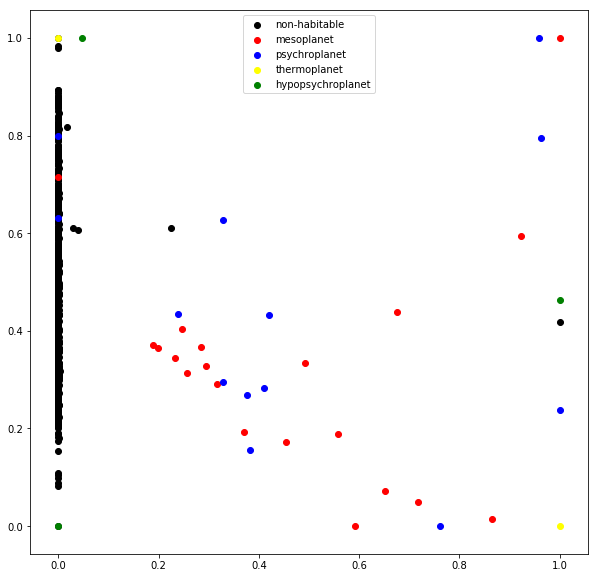

In [4]:
labels=df["P. Habitable Class"].unique().tolist()
colors=["black","red","blue","yellow","green"]
plt.figure(figsize=(10,10))
for x in range(len(labels)):
    data=df[df["P. Habitable Class"]==labels[x]]
    data=data[["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Ts Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]]
    pca = sklearnPCA(n_components=2,random_state=0)
    reduced = pd.DataFrame(pca.fit_transform(data))
    reduced= (reduced - reduced.min())/(reduced.max() - reduced.min())
    plt.scatter(reduced[0], reduced[1], label=labels[x], c=colors[x])
    
plt.legend()
plt.show()

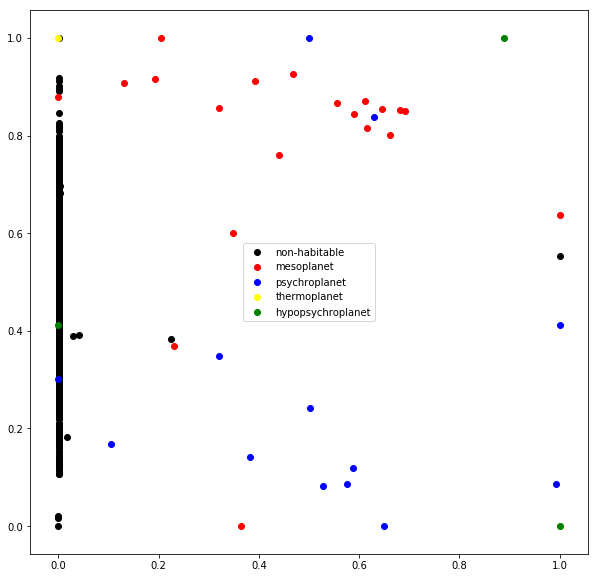

In [5]:
labels=df["P. Habitable Class"].unique().tolist()
colors=["black","red","blue","yellow","green"]
plt.figure(figsize=(10,10))
for x in range(len(labels)):
    data=df[df["P. Habitable Class"]==labels[x]]
    data=data[["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Ts Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]]
    ica = FastICA(n_components=2,max_iter=1000,random_state=0)
    reduced = pd.DataFrame(ica.fit_transform(data))
    reduced= (reduced - reduced.min())/(reduced.max() - reduced.min())
    plt.scatter(reduced[0], reduced[1], label=labels[x], c=colors[x])
    
plt.legend()
plt.show()

# K-Nearest Neighbor

## Find Optimal Number of Neighbors

### With Normalization

20


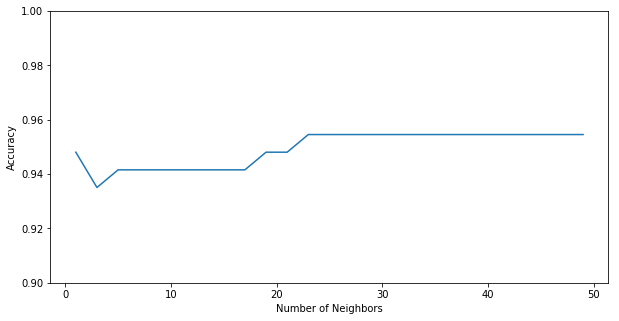

In [6]:
features=["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Ts Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]
print(len(features))
label=["P. Habitable Class"]
x=df[features]
y=df[label]
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
plotx=[]
ploty=[]
for x in range(1,51,2):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(10,5))
plt.ylim(0.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Neighbors');
plt.show()

### Without Normalization

20


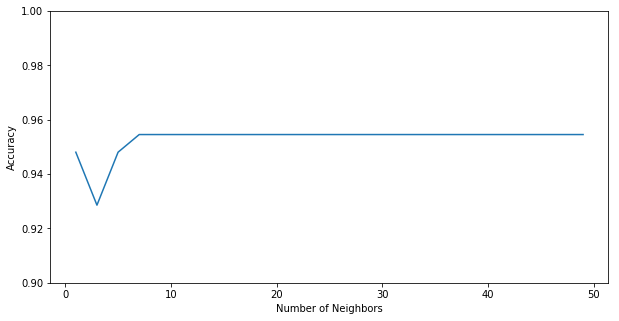

In [7]:
features=["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Ts Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]
print(len(features))
label=["P. Habitable Class"]
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
plotx=[]
ploty=[]
for x in range(1,51,2):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(10,5))
plt.ylim(0.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Neighbors');
plt.show()

## Preventing Curse of Dimensionality

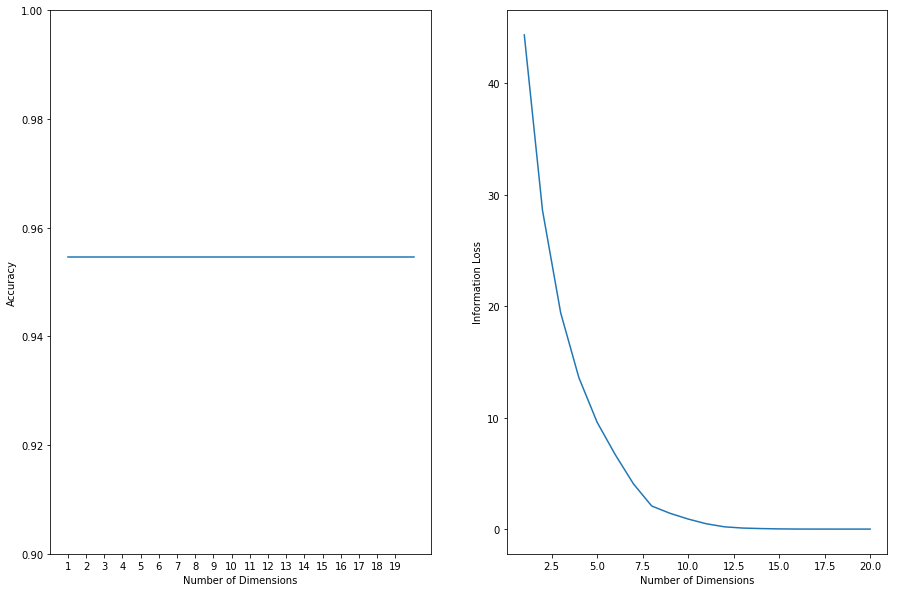

In [8]:
plotx=[]
ploty=[]
dimensionx=[]
dimensiony=[]
for x in range(1,len(features)+1):
    neigh = KNeighborsClassifier(n_neighbors=10)
    data = df[features]
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data)
    pca = sklearnPCA(n_components=x,random_state=0)
    data = pd.DataFrame(pca.fit_transform(data))
    loss=(1-sum(pca.explained_variance_ratio_))*100
    #print("Information Loss at "+str(x)+" dimensions:"+str(loss))
    y=df[label]
    train_data, test_data, train_lbl, test_lbl = train_test_split(data,y, test_size=.20, random_state=0)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    dimensionx.append(x)
    dimensiony.append(loss)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(range(0,20))
plt.ylim(.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Dimensions');
plt.subplot(1,2,2)
plt.plot(dimensionx,dimensiony)
plt.ylabel('Information Loss');
plt.xlabel('Number of Dimensions');
plt.show()

# Support Vector Machines

In [9]:
kernels=[]
accuracy=[]

In [10]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
clf = SVC(random_state=0,kernel="rbf",gamma=.7)
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
accuracy.append(acc)
kernels.append("RBF Kernel")
print(acc)

0.9545454545454546


In [11]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
clf = SVC(random_state=0,kernel="poly")
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
kernels.append("Poly Kernel with Degree 3")
accuracy.append(acc)
print(acc)

0.9545454545454546


In [12]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
clf = SVC(random_state=0,kernel="linear")
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
kernels.append("Linear")
accuracy.append(acc)
print(acc)

0.9545454545454546


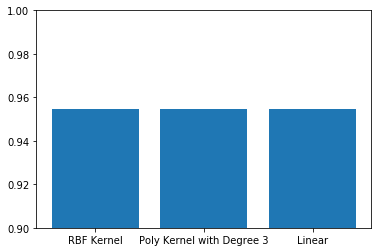

[0.9545454545454546, 0.9545454545454546, 0.9545454545454546]


In [13]:
plt.figure()
plt.bar(kernels,accuracy)
plt.ylim(.9,1)
plt.show()
print(accuracy)

# Decision Trees

In [30]:
x=df[features]
y=df[label]
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0)
clf = tree.DecisionTreeClassifier(random_state=0,min_samples_split=10)
clf = clf.fit(train_data, train_lbl)
clf.score(test_data,test_lbl)

0.9935064935064936

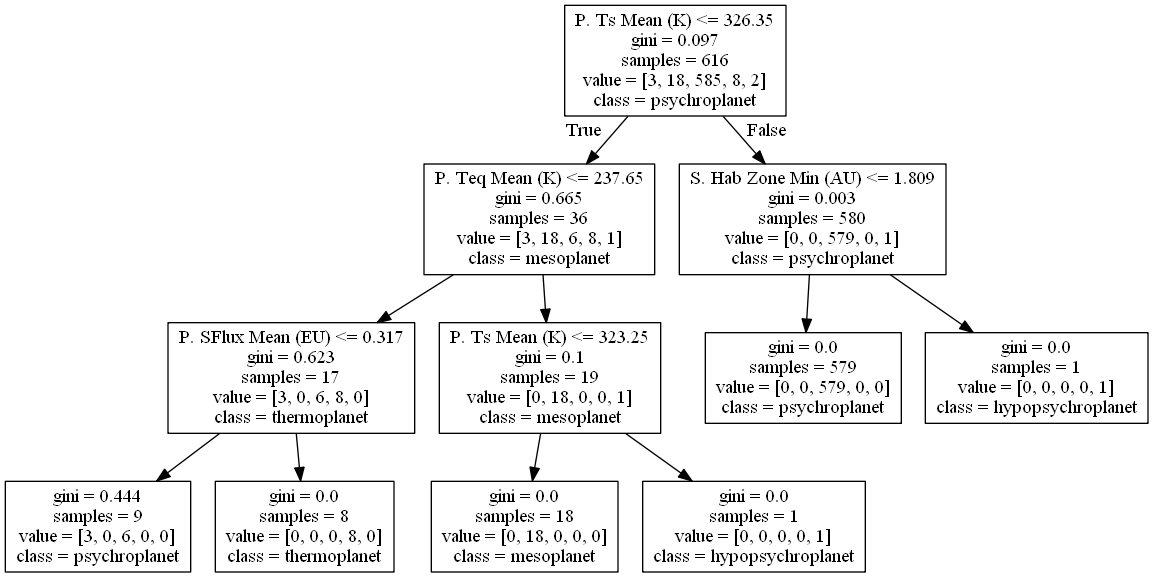

In [31]:
graph = pydotplus.graph_from_dot_data(tree.export_graphviz(clf,feature_names = features,class_names = labels))  
Image(graph.create_png())